In [69]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 7.2 MB 547 kB/s eta 0:00:01     |███████████▎                    | 2.5 MB 1.6 MB/s eta 0:00:03     |███████████████████████▋        | 5.3 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 745 kB/s  eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [70]:
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

In [33]:
filename = "dataset-20.csv"
start = 6700000001
start_transmit = 0
end_transmit = 7

In [24]:
df = pd.read_csv(filename, parse_dates=["When"])
df.sort_values(by="When", inplace=True)

In [25]:
people = len(set(df['Phone1']) | set(df['Phone2']))
print("people =", people)

people = 10


In [26]:
df

When      Phone1      Phone2
15 2020-01-01 01:39:24  6700000004  6700000001
4  2020-01-01 07:56:25  6700000005  6700000003
6  2020-01-02 07:45:06  6700000008  6700000006
10 2020-01-02 23:36:55  6700000009  6700000009
3  2020-01-03 07:58:18  6700000000  6700000005
16 2020-01-03 12:58:25  6700000009  6700000004
12 2020-01-03 16:41:18  6700000006  6700000005
17 2020-01-04 12:45:11  6700000006  6700000003
1  2020-01-05 06:03:16  6700000000  6700000007
0  2020-01-06 10:21:21  6700000008  6700000009
13 2020-01-07 06:30:31  6700000005  6700000004
11 2020-01-07 19:29:39  6700000005  6700000006
9  2020-01-08 12:29:32  6700000004  6700000007
7  2020-01-09 03:03:18  6700000006  6700000002
2  2020-01-09 14:54:03  6700000001  6700000000
18 2020-01-09 20:03:01  6700000002  6700000007
5  2020-01-10 10:42:25  6700000003  6700000004
19 2020-01-10 13:23:26  6700000009  6700000007
8  2020-01-10 16:06:30  6700000006  6700000008
14 2020-01-10 23:05:43  6700000005  6700000002

In [37]:
min_dt = df['When'].min().date()
max_dt = df['When'].max().date()
dates = [dt.date() for dt in pd.date_range(min_dt, max_dt)]
D = len(dates)

In [61]:
sick = {start: min_dt}
def contageous(phone, d):
    return phone in sick \
       and start_transmit <= (d - sick[phone]).days < end_transmit

In [62]:
M = len(df)
i = 0
contacts = []
cases = []
infected = []
for d in dates:
    j = i
    sick_before = len(sick)
    while i < M and df.iloc[i, 0].date() == d:
        phone1 = df.iloc[i, 1]
        phone2 = df.iloc[i, 2]
        if contageous(phone1, d) and phone2 not in sick: sick[phone2] = d
        if contageous(phone2, d) and phone1 not in sick: sick[phone1] = d 
        i += 1
    contacts.append(i - j)
    sick_after = len(sick)
    cases.append(sick_after - sick_before)
    infected.append(sick_after)

In [63]:
print("max contacts per day =", max(contacts))
print("min contacts per day =", min(contacts))
print("average contacts per day =", M/D)

max contacts per day = 4
min contacts per day = 1
average contacts per day = 2.0


In [64]:
print("total infected =", len(sick))

total infected = 8


In [66]:
print("max cases per day =", max(cases))

max cases per day = 2


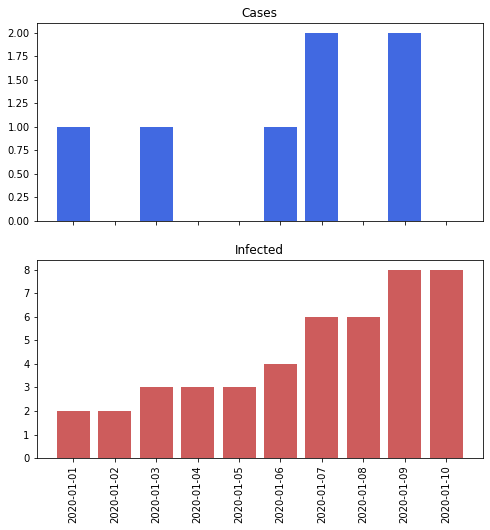

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 8)
ax1.bar(dates, cases, color="royalblue")
ax1.set_title('Cases')
ax2.bar(dates, infected, color="indianred")
ax2.set_title('Infected')
plt.xticks(rotation=90)
plt.savefig("diagrams.png")

In [74]:
def track(filename, start, start_transmit, end_transmit):
    # read the data
    df = pd.read_csv(filename, parse_dates=["When"])
    df.sort_values(by="When", inplace=True)
    # count people
    people = len(set(df['Phone1']) | set(df['Phone2']))
    print("people =", people)
    # find dates
    min_dt = df['When'].min().date()
    max_dt = df['When'].max().date()
    dates = [dt.date() for dt in pd.date_range(min_dt, max_dt)]
    D = len(dates)
    # keep who's sick and who's contageous
    sick = {start: min_dt}
    def contageous(phone, d):
        return phone in sick \
           and start_transmit <= (d - sick[phone]).days < end_transmit
    # simulation
    M = len(df)
    i = 0
    contacts = []
    cases = []
    infected = []
    for d in dates:
        j = i
        sick_before = len(sick)
        while i < M and df.iloc[i, 0].date() == d:
            phone1 = df.iloc[i, 1]
            phone2 = df.iloc[i, 2]
            if contageous(phone1, d) and phone2 not in sick: sick[phone2] = d
            if contageous(phone2, d) and phone1 not in sick: sick[phone1] = d 
            i += 1
        contacts.append(i - j)
        sick_after = len(sick)
        cases.append(sick_after - sick_before)
        infected.append(sick_after)
    # print the rest
    print("max contacts per day =", max(contacts))
    print("min contacts per day =", min(contacts))
    print("average contacts per day =", M/D)
    print("total infected =", len(sick))
    print("max cases per day =", max(cases))
    # plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.set_size_inches(8, 8)
    ax1.bar(dates, cases, color="royalblue")
    ax1.set_title('Cases')
    ax2.bar(dates, infected, color="indianred")
    ax2.set_title('Infected')
    plt.xticks(rotation=90)
    plt.savefig("diagrams.png")

people = 10
max contacts per day = 4
min contacts per day = 1
average contacts per day = 2.0
total infected = 8
max cases per day = 2


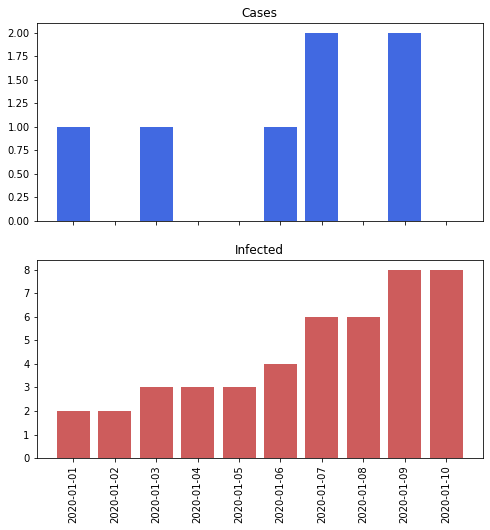

In [75]:
track("dataset-20.csv", 6700000001, 0, 7)

people = 100
max contacts per day = 28
min contacts per day = 8
average contacts per day = 16.666666666666668
total infected = 93
max cases per day = 11


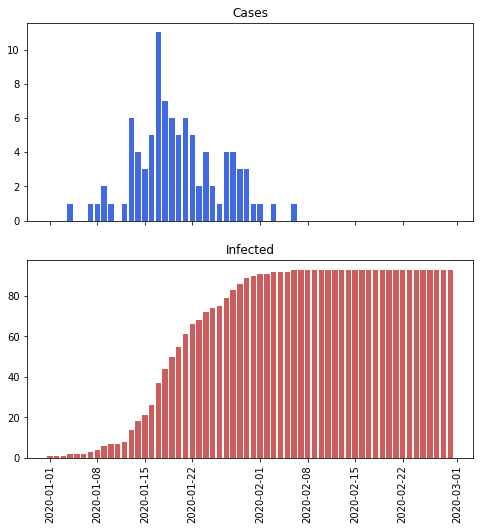

In [76]:
track("dataset-1000.csv", 6700000001, 0, 7)

people = 100
max contacts per day = 28
min contacts per day = 8
average contacts per day = 16.666666666666668
total infected = 92
max cases per day = 7


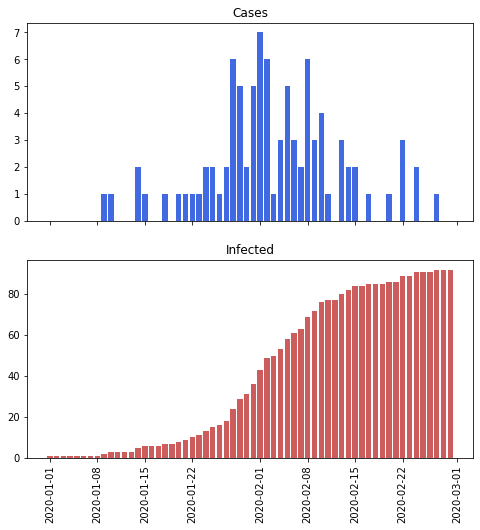

In [77]:
track("dataset-1000.csv", 6700000042, 3, 10)